## Problem Description



### *Cirrhosis Patient Survival Prediction*
Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption.  This project aims to  predict survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation). The dataset is sourced from https://https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction/.

##EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Loading and displaying the dataset
# The dataset is sourced from: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Zoomcamp/Week 11/cirrhosis.csv", index_col='ID')

In [176]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [177]:
df.iloc[0,:]

N_Days                       400
Status                         D
Drug             D-penicillamine
Age                        21464
Sex                            F
Ascites                        Y
Hepatomegaly                   Y
Spiders                        Y
Edema                          Y
Bilirubin                   14.5
Cholesterol                261.0
Albumin                      2.6
Copper                     156.0
Alk_Phos                  1718.0
SGOT                      137.95
Tryglicerides              172.0
Platelets                  190.0
Prothrombin                 12.2
Stage                        4.0
Name: 1, dtype: object

###Missing value counts
There are some missing values in some columns. We will impute them later.

In [4]:
df.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [5]:
df.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

###Ranges of feature values

In [6]:
!pip install sweetviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 49.3 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


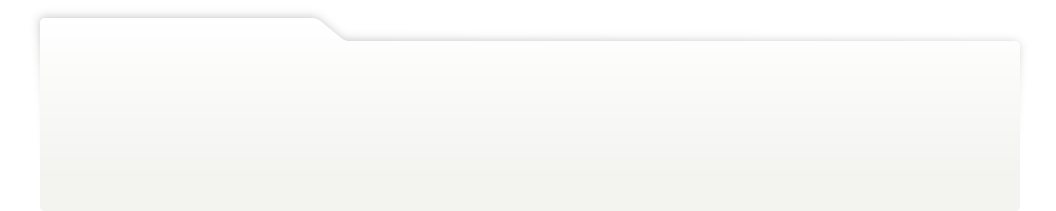
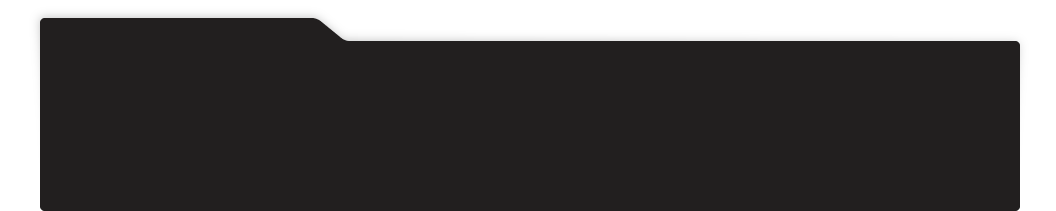
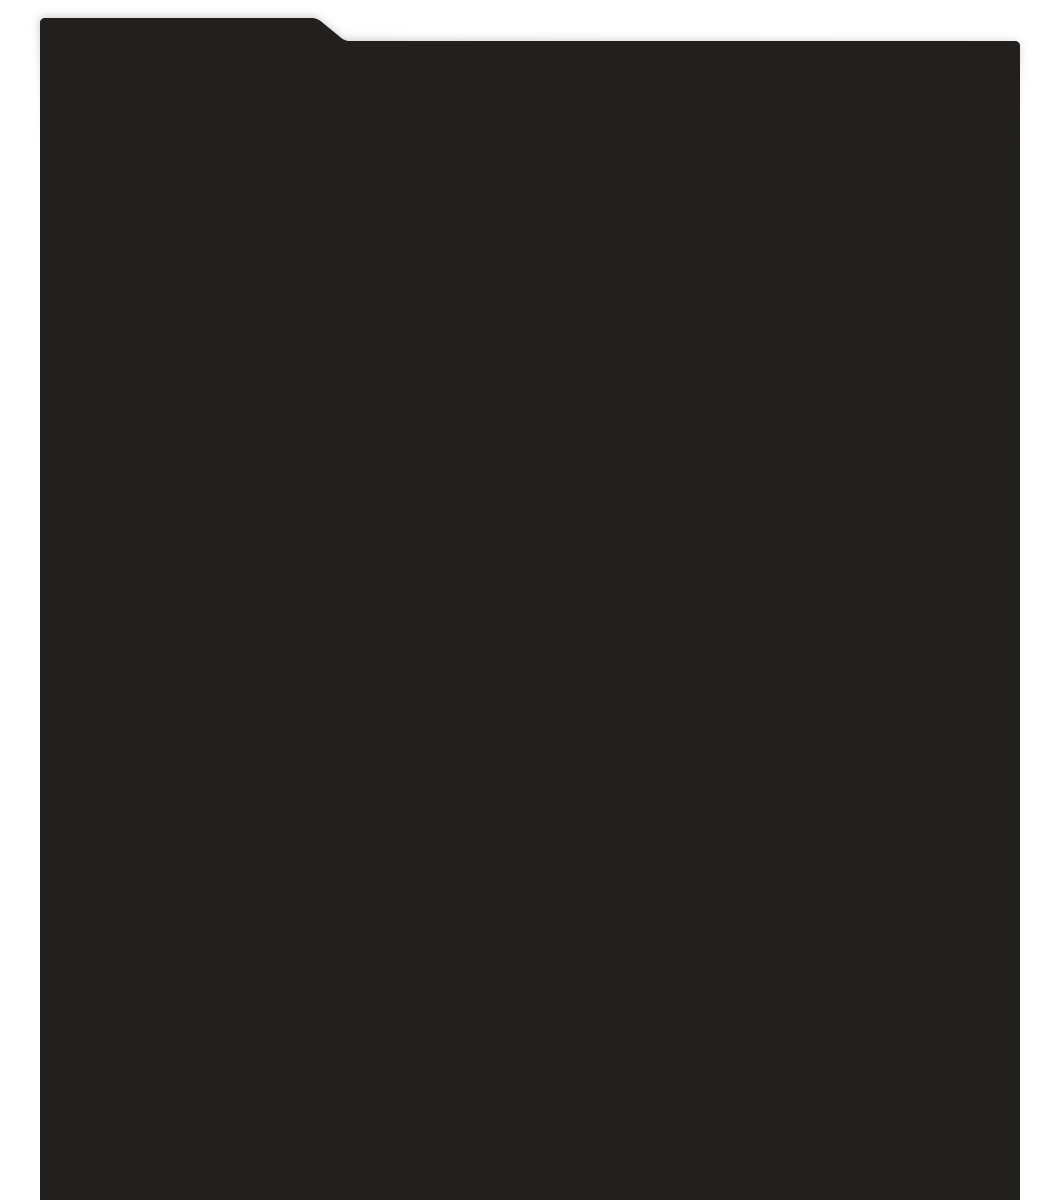
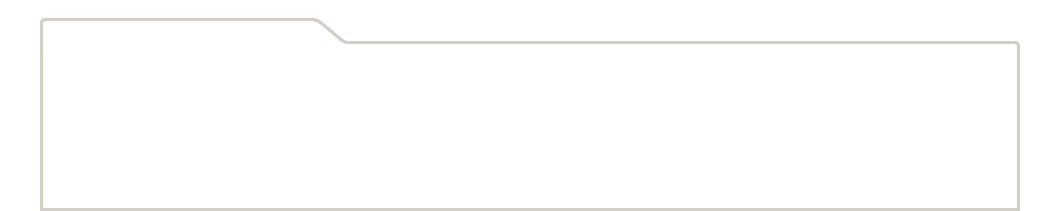
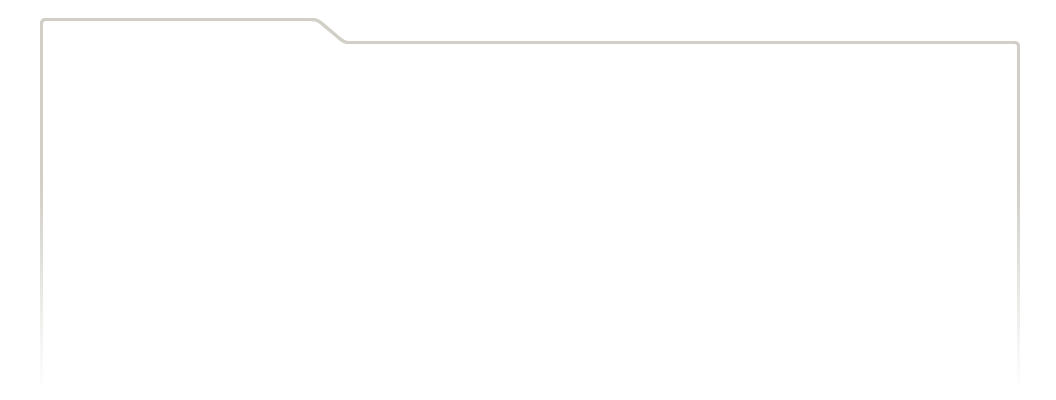
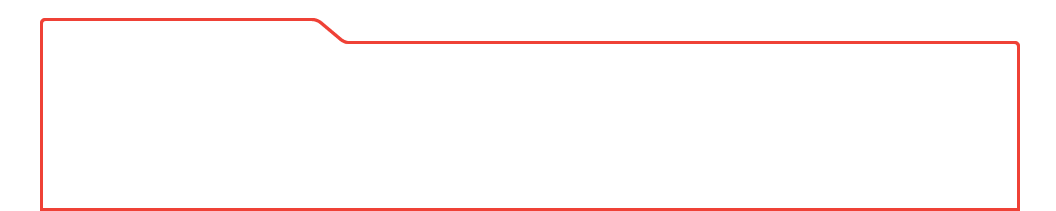
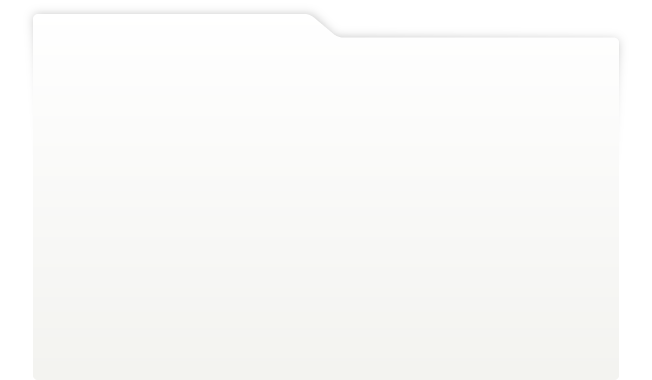
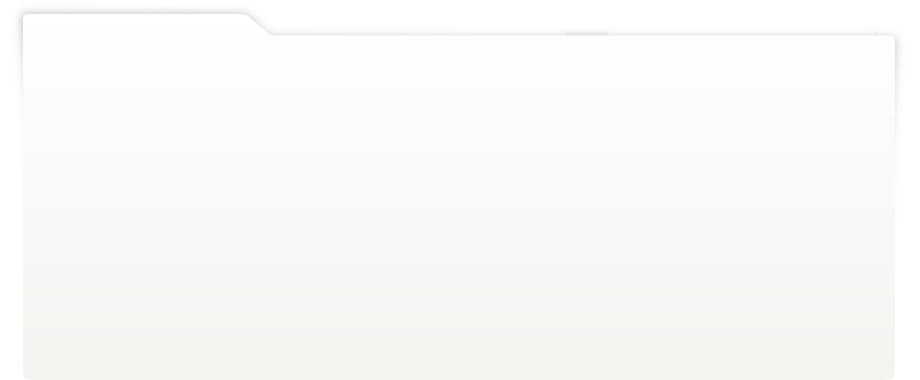
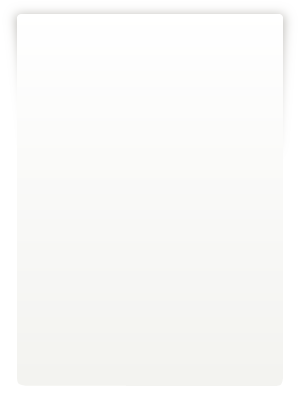
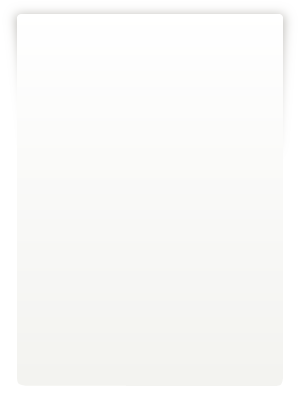
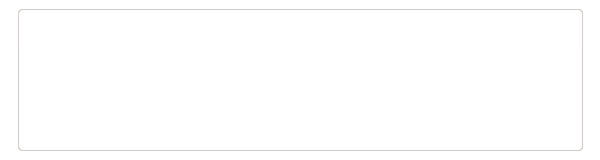
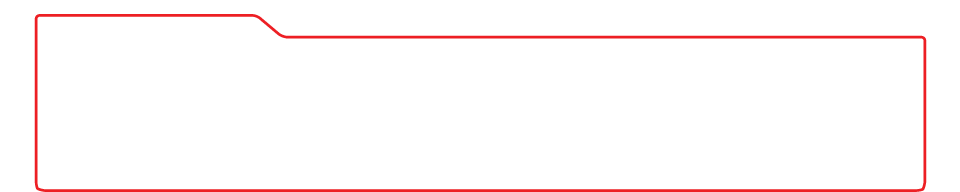
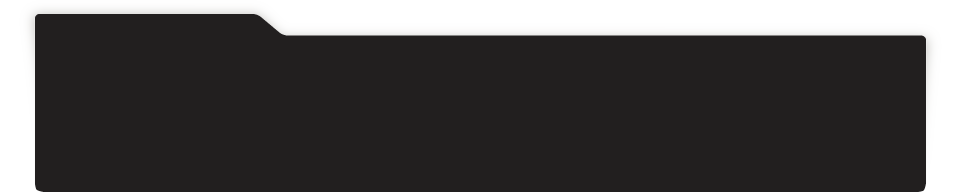
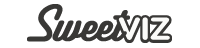
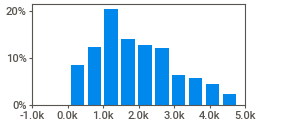
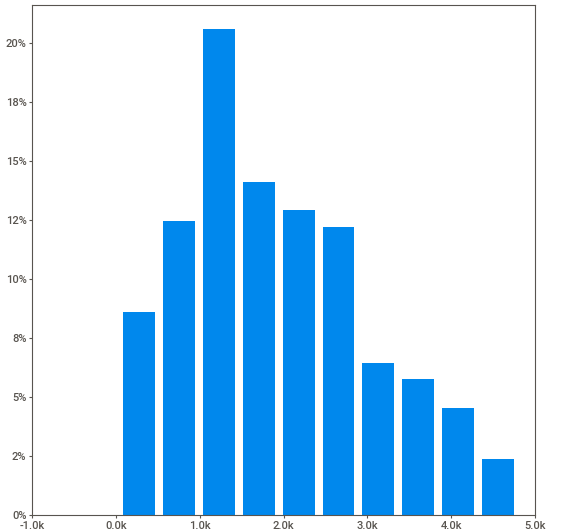
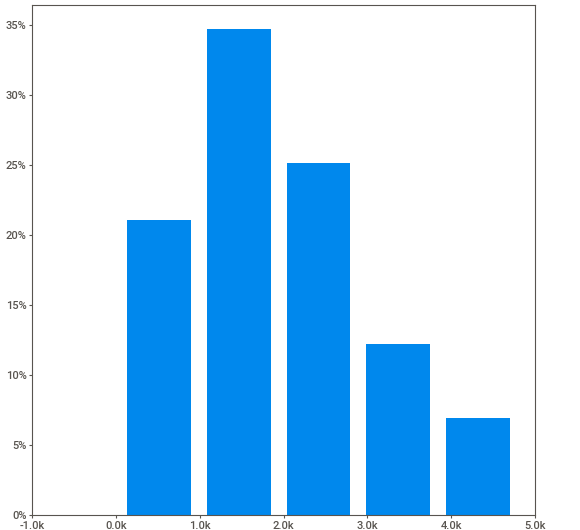
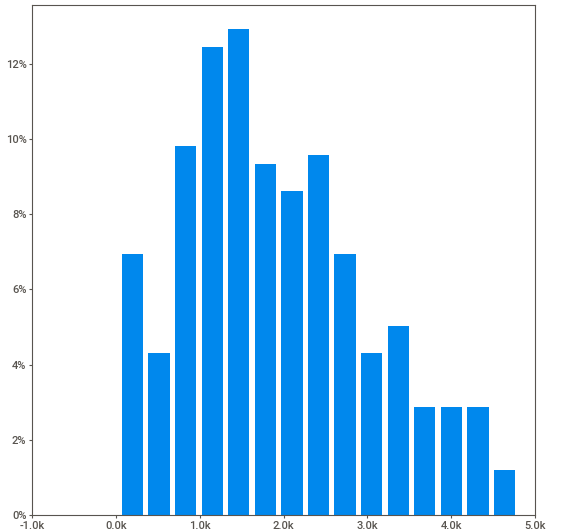
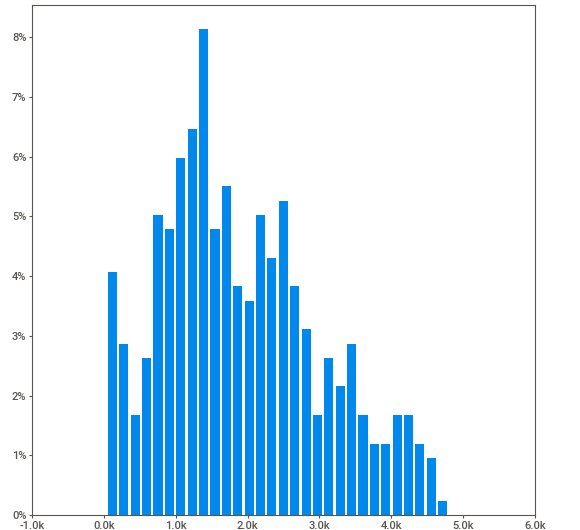
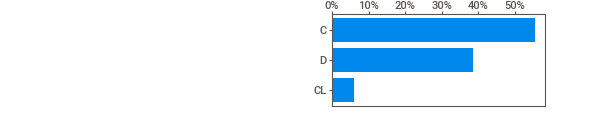
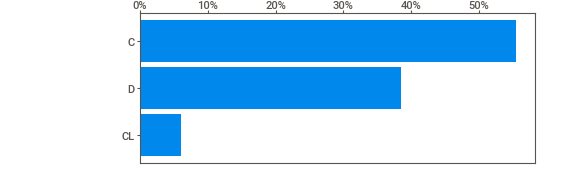
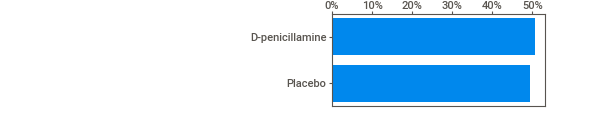
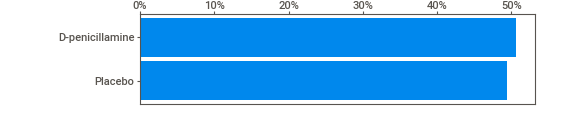
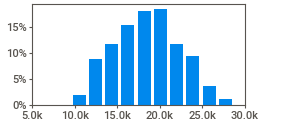
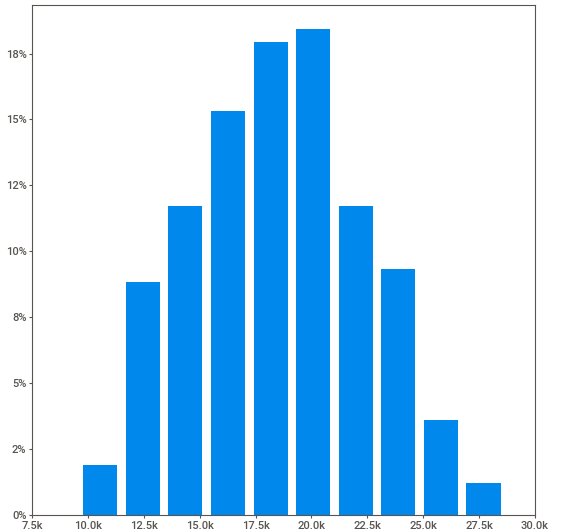
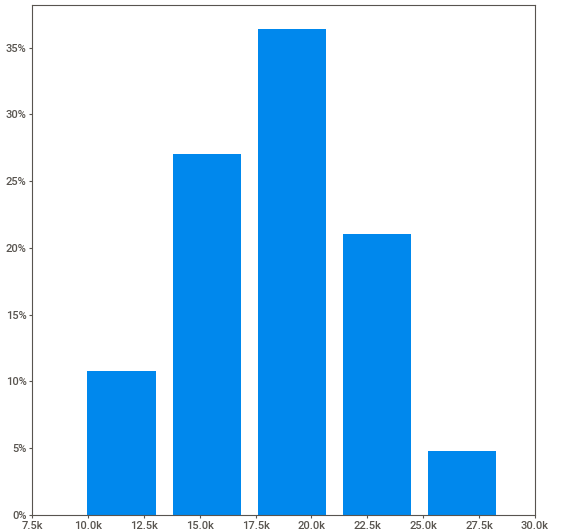
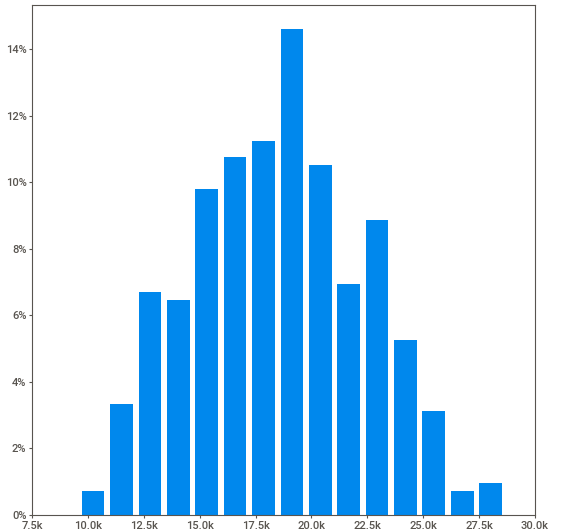
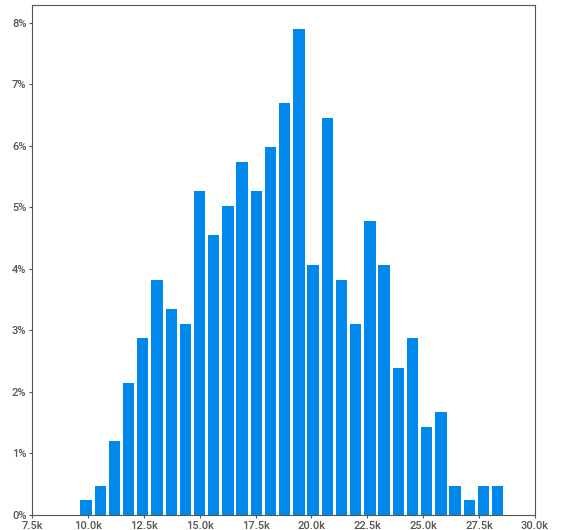
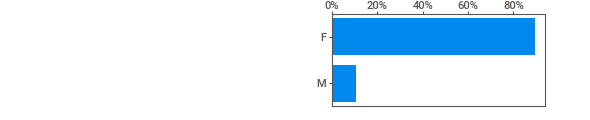
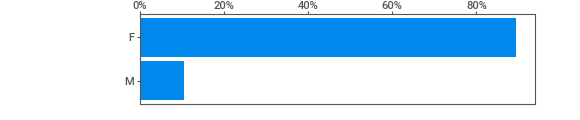
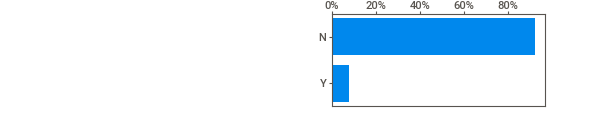
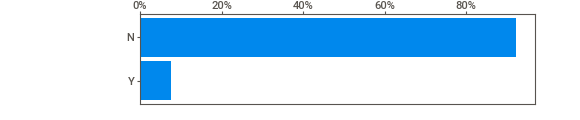
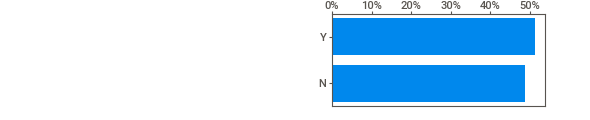
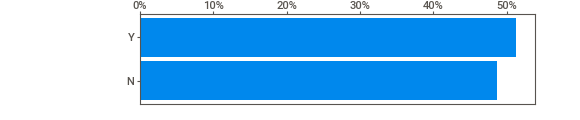
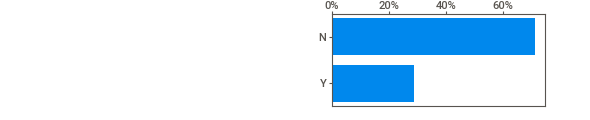
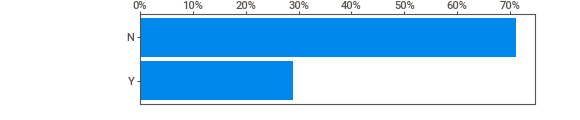
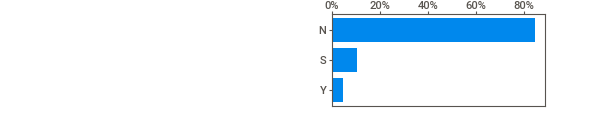
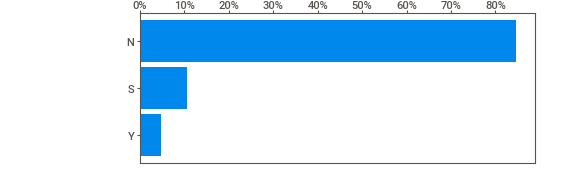
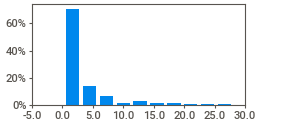
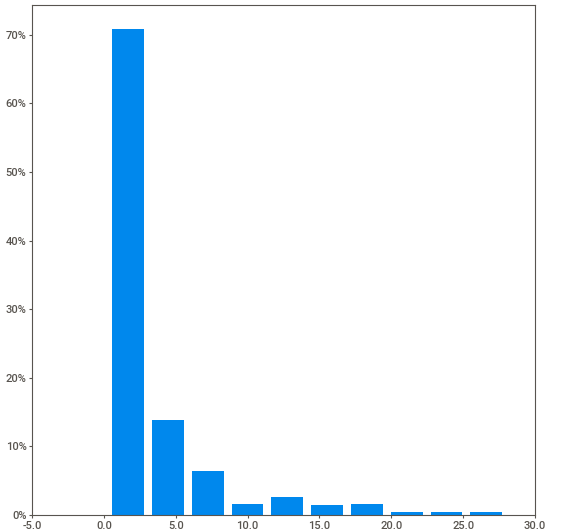
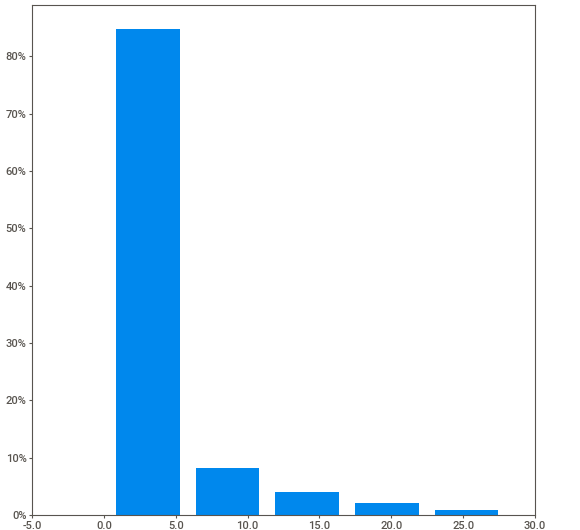
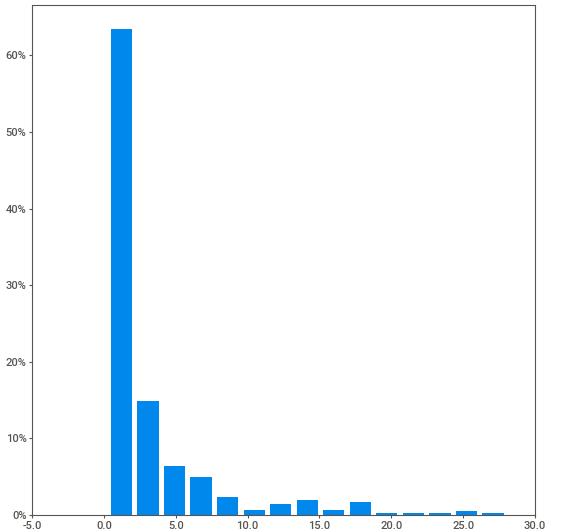
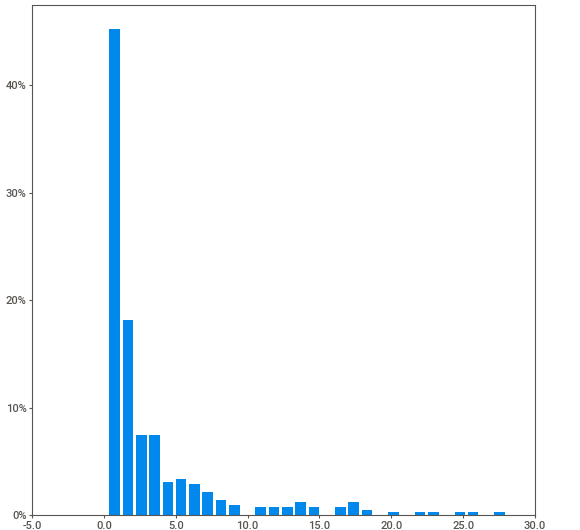
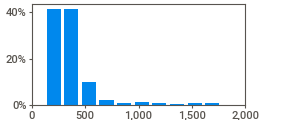
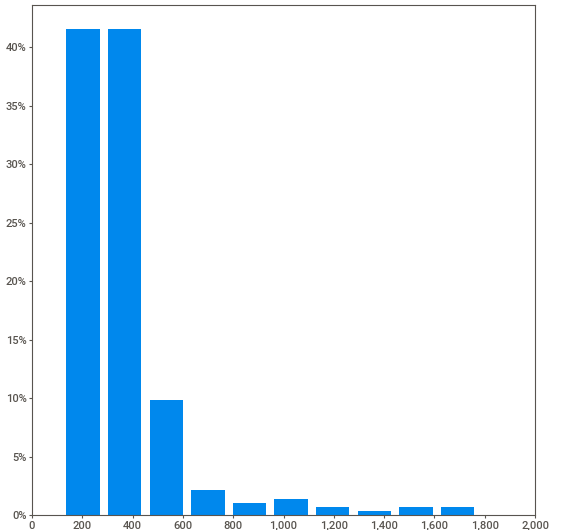
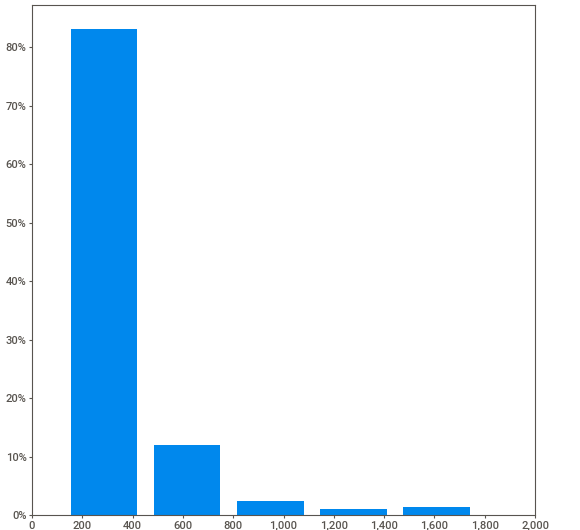
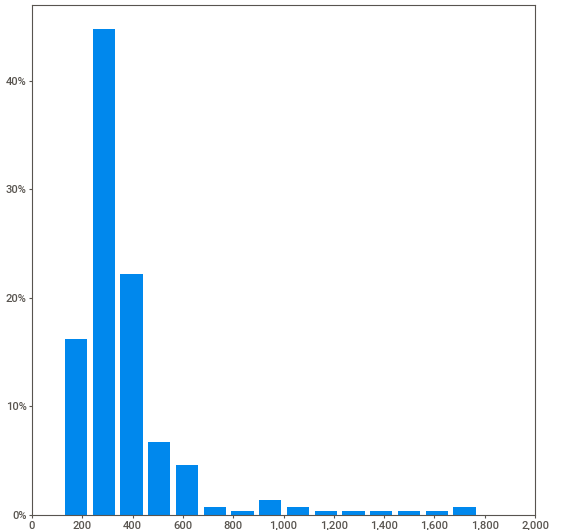
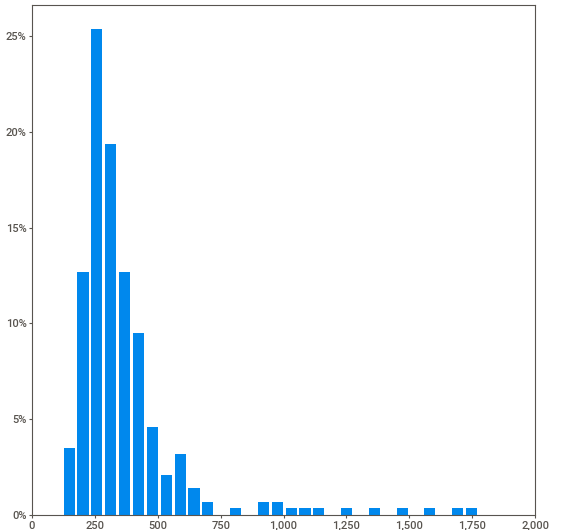
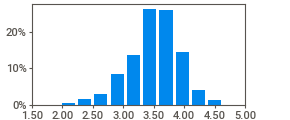
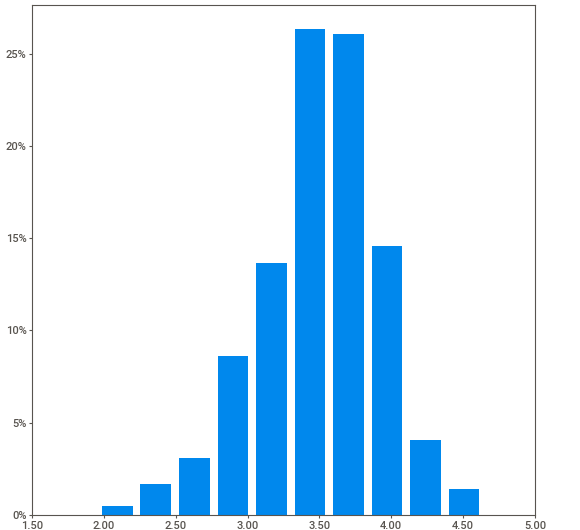
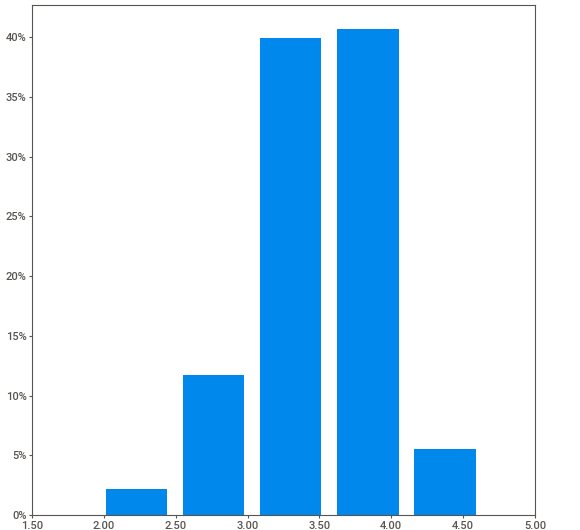
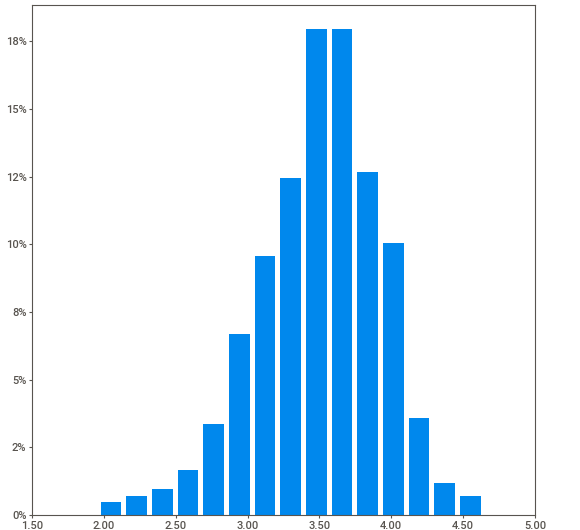
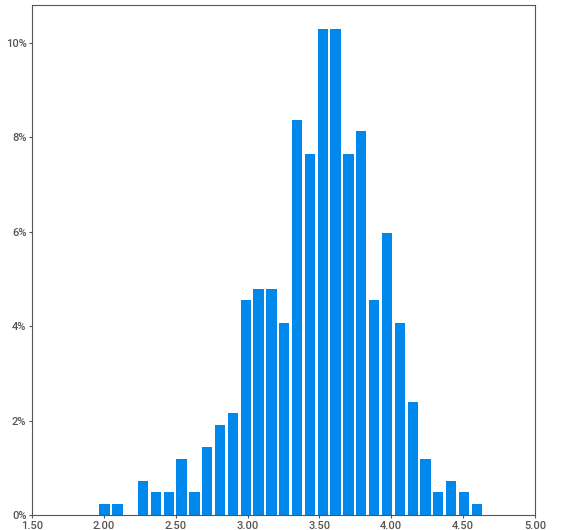
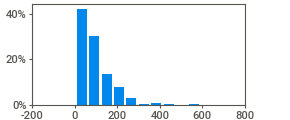
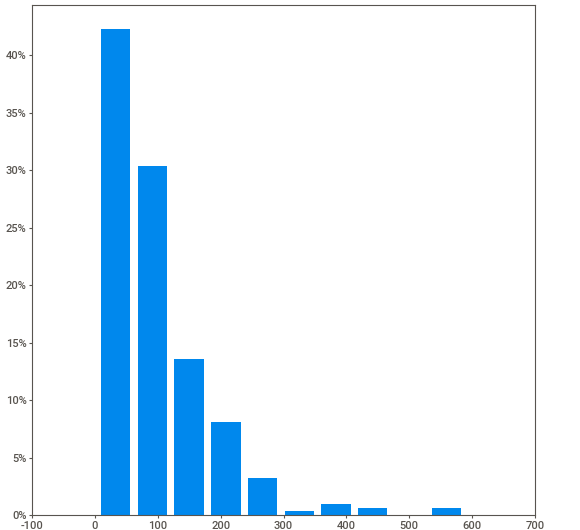
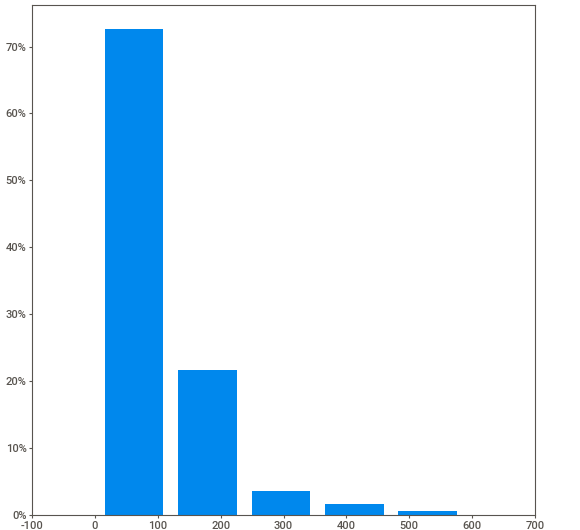
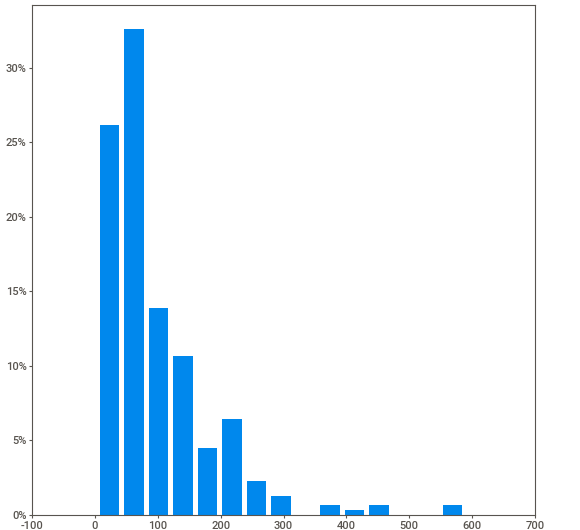
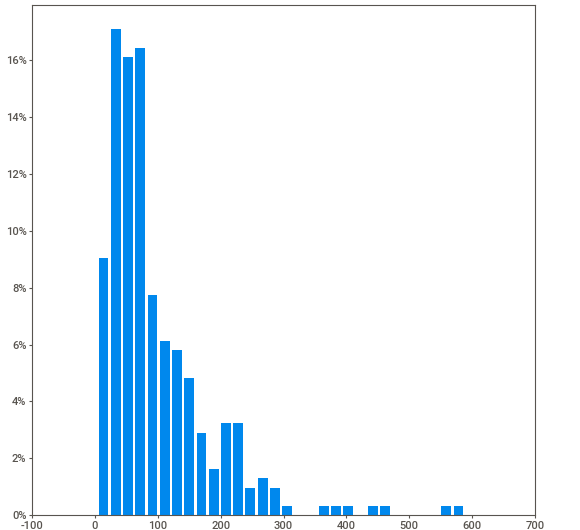
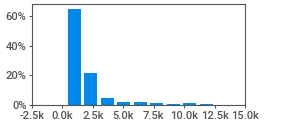
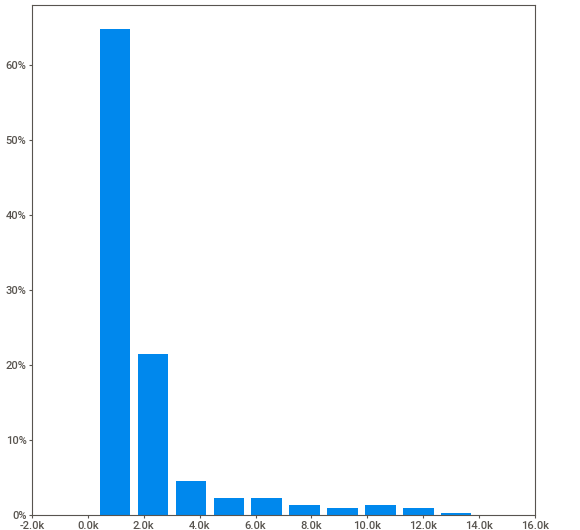
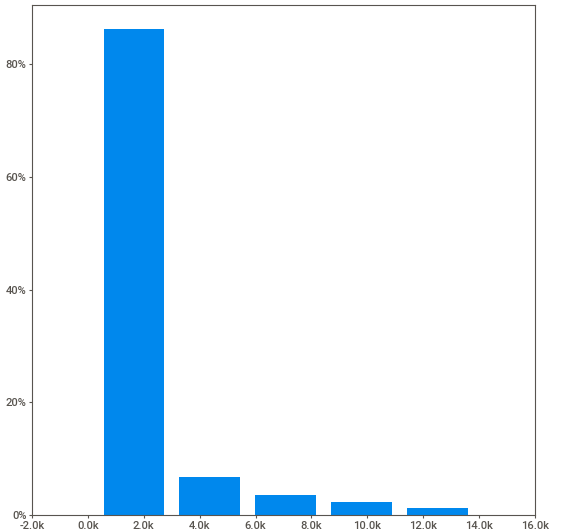
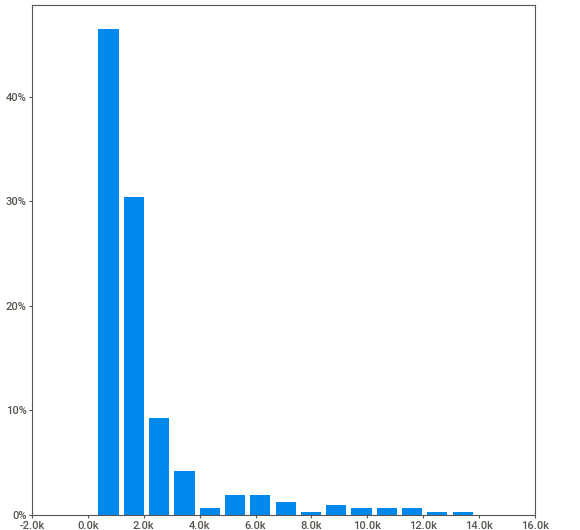
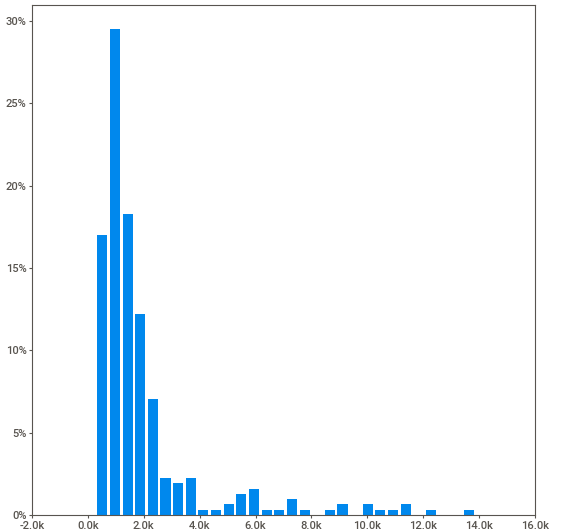
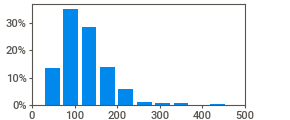
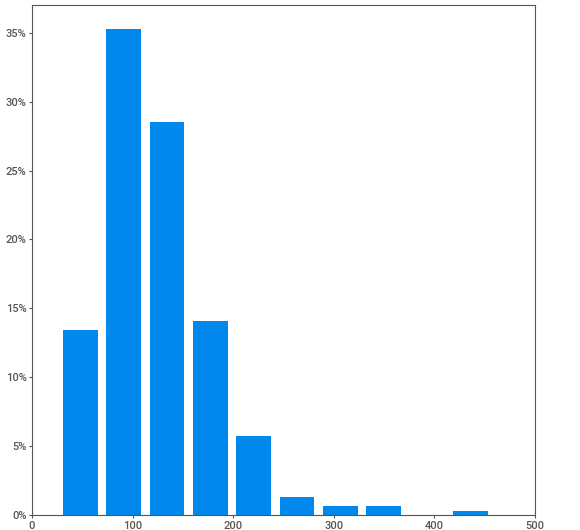
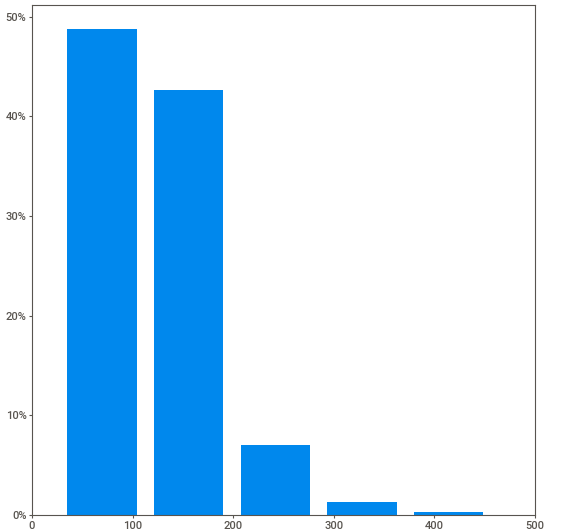
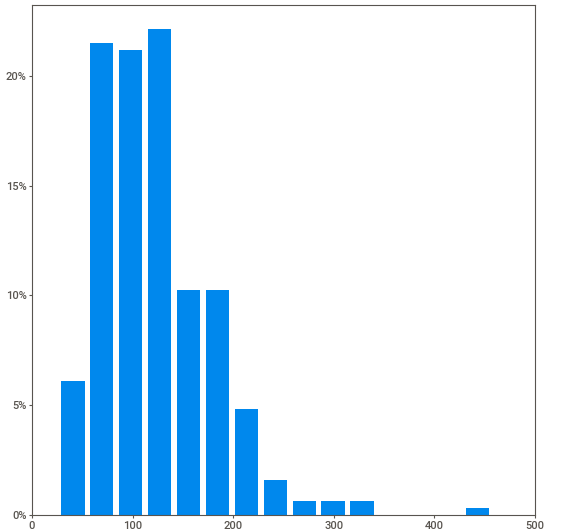
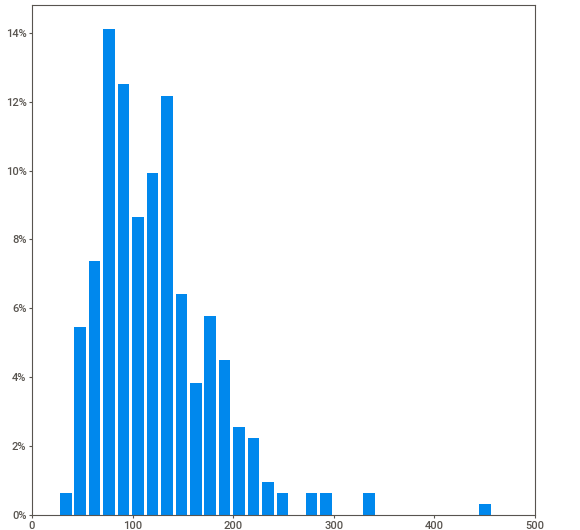
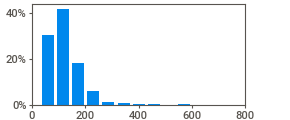
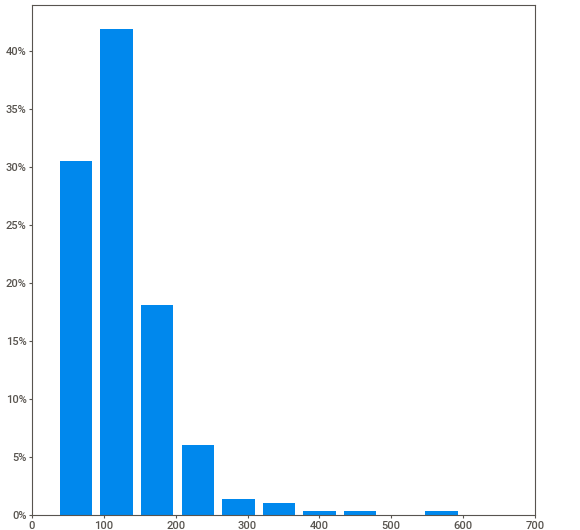
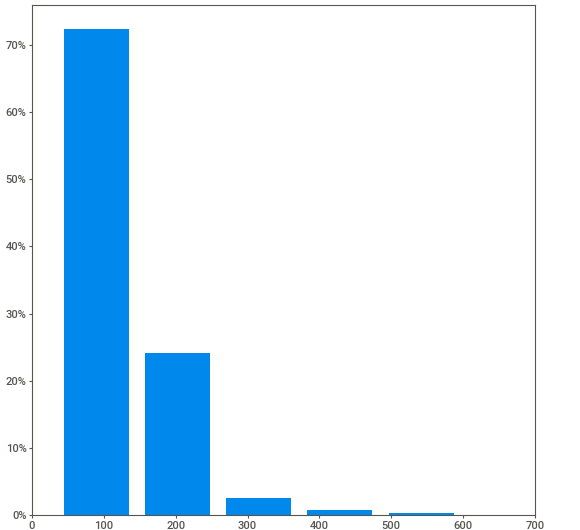
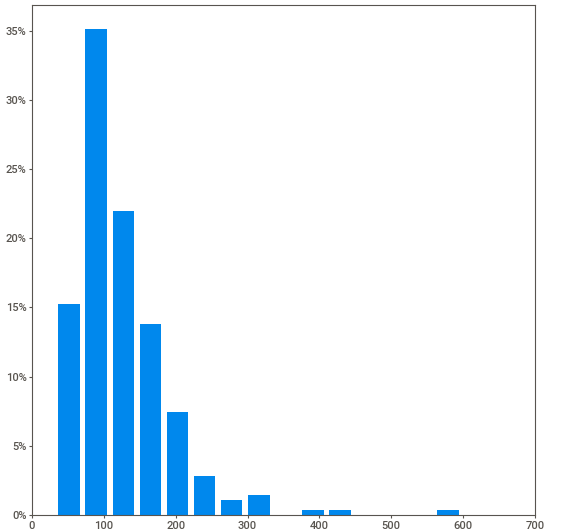
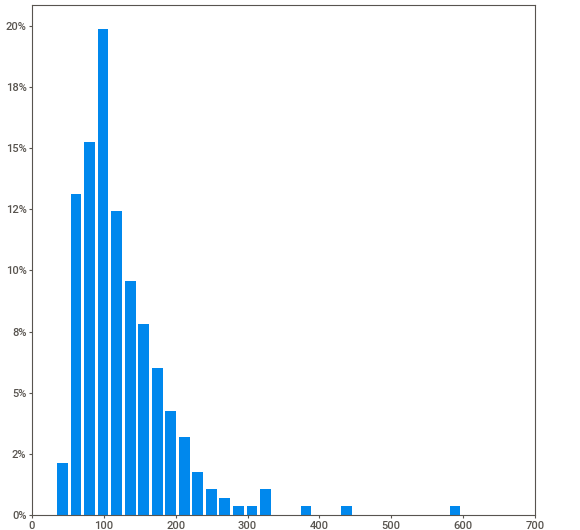
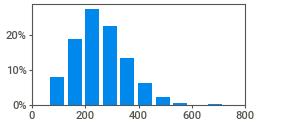
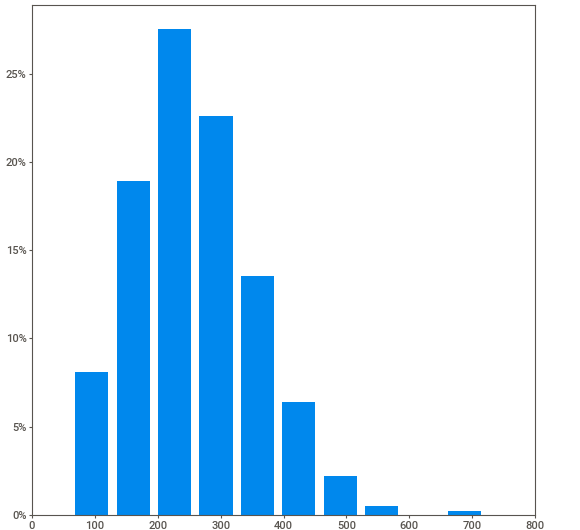
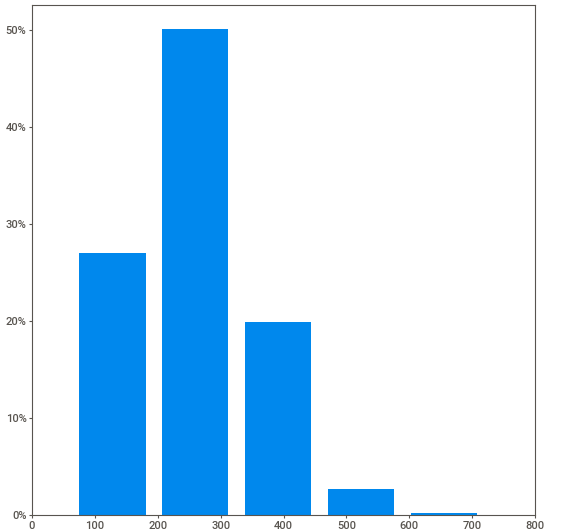
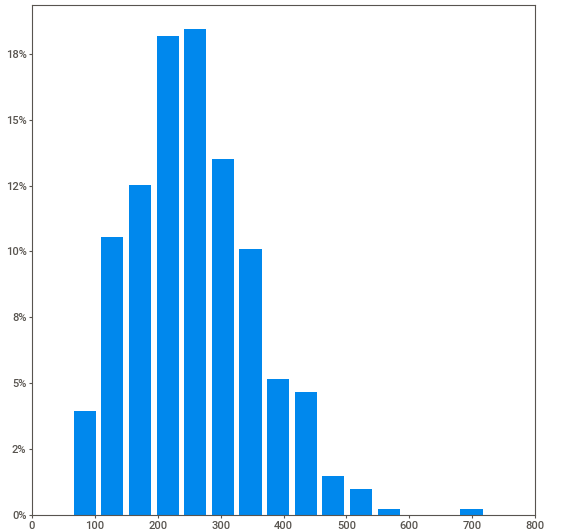
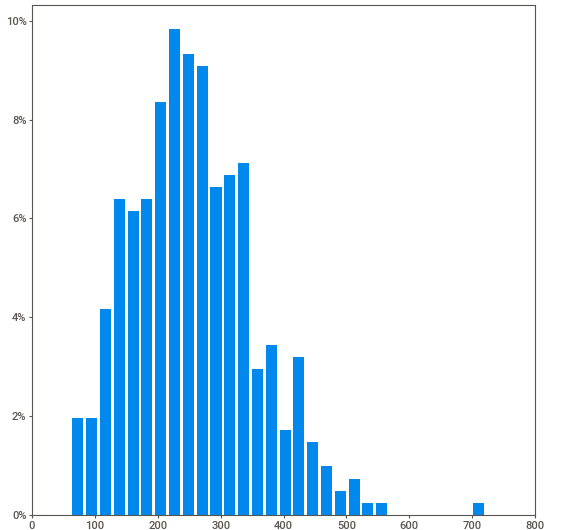
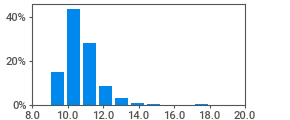
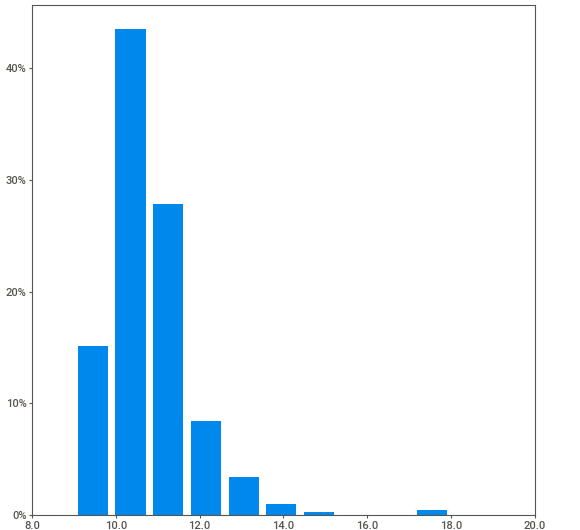
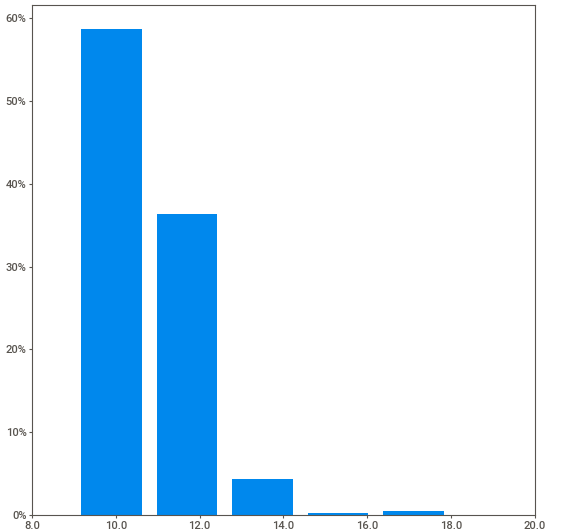
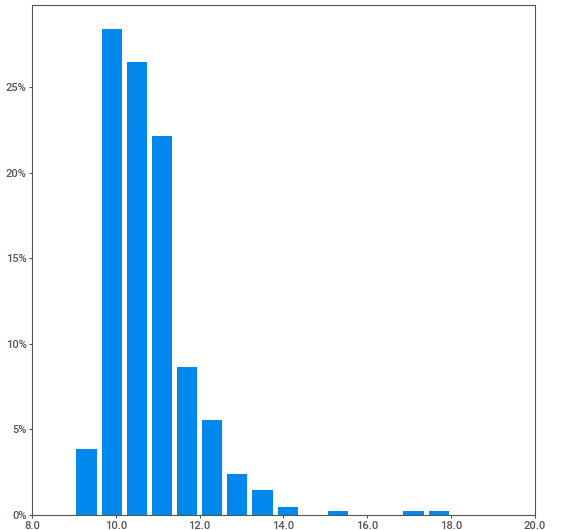
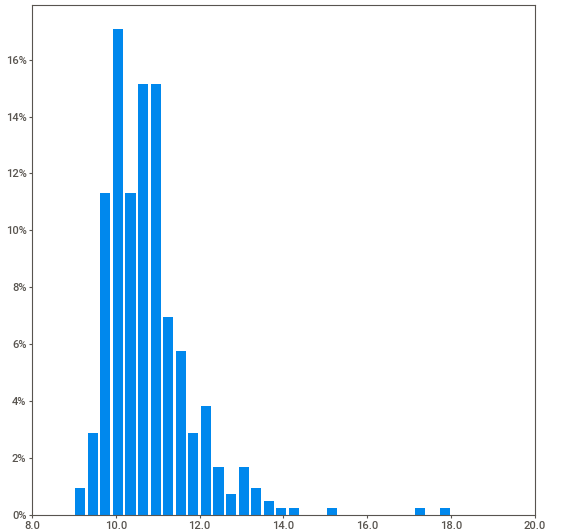
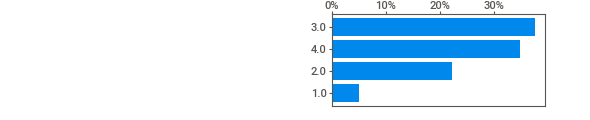
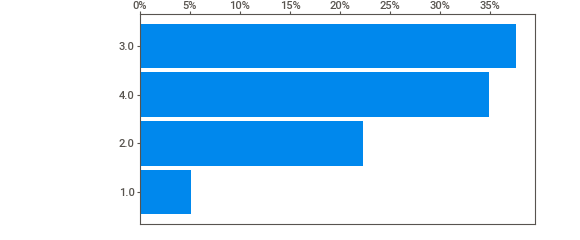
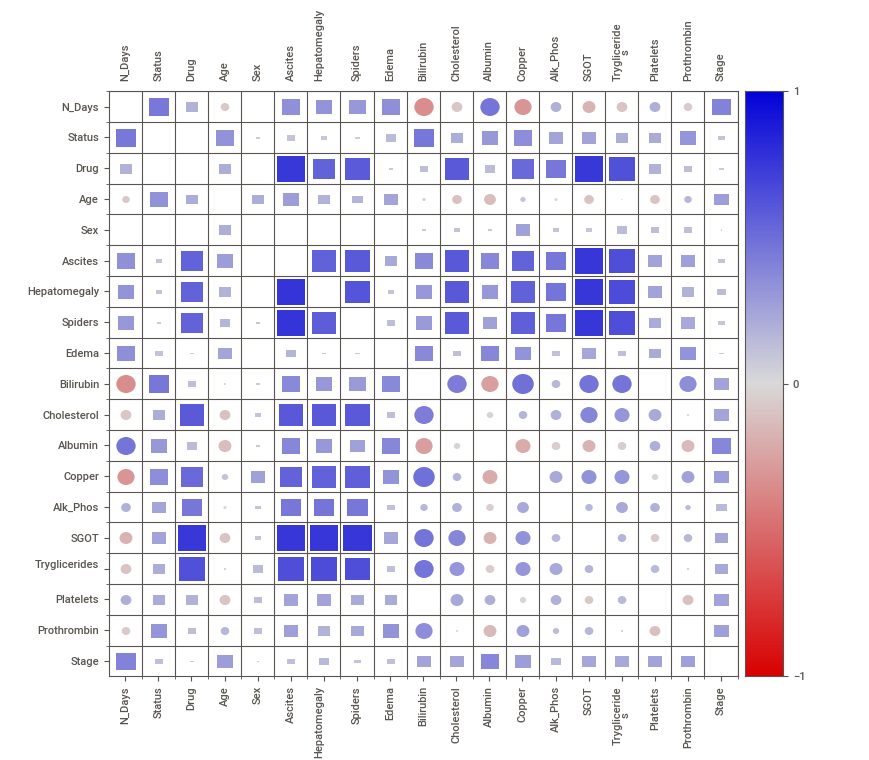
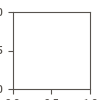

In [7]:
import sweetviz
my_report = sweetviz.analyze([df, "Original Dataset"])
my_report.show_notebook(w="100%", h="full")

### Correlation between the independent variables

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<ipython-input-9-b73946f78503>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues, ax =ax)


Text(0.5, 1.0, 'Variable Correlation')

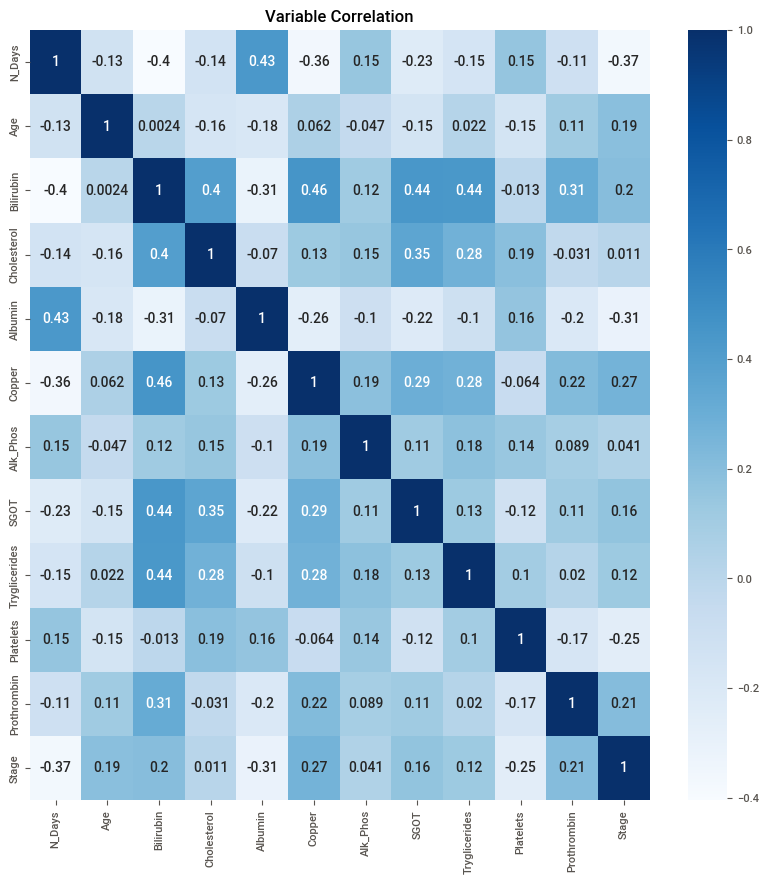

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues, ax =ax)
plt.title('Variable Correlation')

### Analysis of target variable

<Axes: >

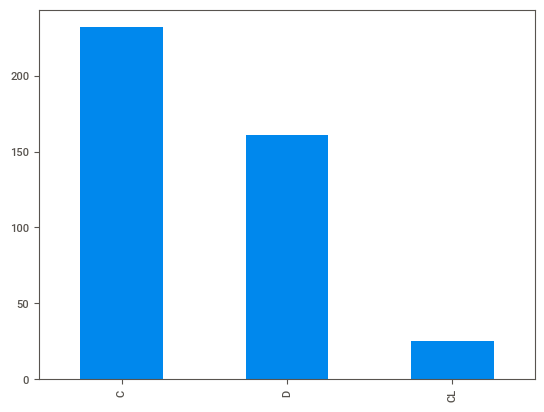

In [10]:
df['Status'].value_counts().plot(kind='bar')

In [11]:
categorical_features = df.select_dtypes(include = ['object']).columns
categorical_features = list(categorical_features)

In [12]:
categorical_features.remove("Status")

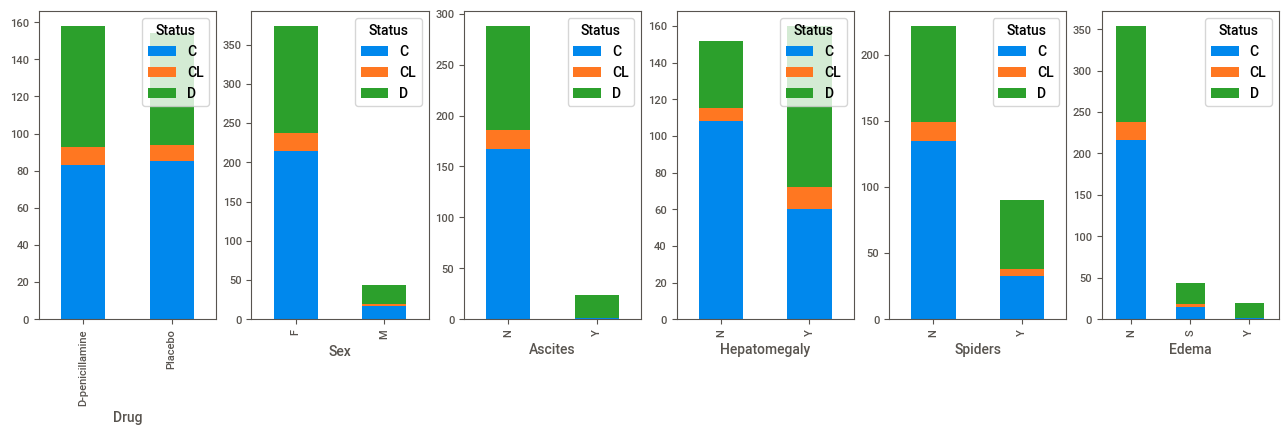

In [13]:
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
  pd.crosstab(df[categorical_feature], df['Status'] ).plot(kind='bar', ax=ax[i], stacked=True, figsize=(16, 4))
fig.show()

###Setting up Validation Framework

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)



In [16]:
y_full_train = df_full_train.Status.values
y_test = df_test.Status.values

del df_full_train['Status']
del df_test['Status']

### Imputing Missing Values

In [17]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Assuming your dataframe is named 'df_train'
numerical_columns = df_full_train.select_dtypes(include=['int64','float64']).columns
categorical_columns = df_full_train.select_dtypes(include=['object']).columns

# KNN Imputation for Numerical Columns
knn_imputer = KNNImputer()
df_full_train[numerical_columns] = knn_imputer.fit_transform(df_full_train[numerical_columns])
df_test[numerical_columns] = knn_imputer.transform(df_test[numerical_columns])


# Simple Imputation for Categorical Columns (replace with the mode)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_full_train[categorical_columns] = categorical_imputer.fit_transform(df_full_train[categorical_columns])
df_test[categorical_columns] = categorical_imputer.transform(df_test[categorical_columns])

In [ ]:
df_full_train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,
338,791.0,D-penicillamine,17167.0,F,N,Y,N,N,16.0,335.4,3.42,169.4,1418.60,134.360,124.6,475.0,13.8,2.0
225,2022.0,D-penicillamine,14161.0,F,N,N,N,N,0.7,274.0,3.66,108.0,1065.00,88.350,135.0,251.0,10.1,2.0
377,1987.0,D-penicillamine,12053.0,F,N,Y,N,N,2.2,607.0,3.76,82.4,4270.48,141.852,150.8,253.0,9.9,3.0
313,4062.0,D-penicillamine,21915.0,F,N,Y,N,N,0.7,367.6,3.65,57.2,2387.96,81.294,147.2,378.0,11.0,3.0
166,2721.0,Placebo,15105.0,F,N,Y,N,N,5.7,1480.0,3.26,84.0,1960.00,457.250,108.0,213.0,9.5,2.0


### Feature Importance
Mutual Information (categorical features)

In [18]:
from sklearn.metrics import mutual_info_score

In [19]:
def mutual_info_churn_score(series):
  return mutual_info_score(y_full_train, series)

In [20]:
mi = df_full_train[categorical_columns].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

Ascites         0.054585
Edema           0.051414
Hepatomegaly    0.041915
Spiders         0.019610
Sex             0.006779
Drug            0.000092
dtype: float64

## Model Training and Parameter Tuning

Linear SVC, Bagging Classifier with the Linear SVC estimator, Decision Tree, Random Forest and XGBoost Classifiers are trained and hyperparameters are tuned.
5-fold cross validation is used to validate the models. The weighted f-1 score metric is used to evaluate the classification performance of the models as this is a multi-class classification problem. The best model will be used for deployment.





In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import KFold


In [22]:
from sklearn.feature_extraction import DictVectorizer
dv= DictVectorizer(sparse=False)
train_dicts= df_full_train.to_dict(orient='records')
X_full_train =dv.fit_transform(train_dicts)

test_dicts= df_test.to_dict(orient='records')

X_test =dv.transform(test_dicts)

### Linear SVC

We need to scale our data first in order to train a LinearSVC model.

In [24]:
n_splits=5


In [ ]:
mean_scores=[]
for tol in [1e-4, 1e-5, 1e-6]:
    for c in [1, 0.1, 0.01, 10]:

      kfold =KFold(n_splits=n_splits, shuffle=True, random_state=1)
      scores = []
      for train_idx, val_idx in kfold.split(X_full_train):
        df_train = X_full_train[train_idx]
        y_train = y_full_train[train_idx]
        df_val = X_full_train[val_idx]
        y_val = y_full_train[val_idx]


        clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=1, tol=tol, C=c))
        clf.fit(df_train,y_train)
        y_pred = clf.predict(df_val)

        f1 = f1_score(y_val, y_pred, average='weighted')
        scores.append(f1)
      mean_scores.append((tol,c,np.mean(scores)))


In [46]:
columns =['tol','c','f1']
df_scores=pd.DataFrame(mean_scores,columns = columns)

In [47]:
df_scores=df_scores.sort_values(by=['f1'], ascending=False)
df_scores

,tol,c,f1
1,0.000100,0.10,0.724041
5,0.000010,0.10,0.724041
9,0.000001,0.10,0.724041
2,0.000100,0.01,0.723758
6,0.000010,0.01,0.723758
10,0.000001,0.01,0.723758
3,0.000100,10.00,0.721740
7,0.000010,10.00,0.721740
11,0.000001,10.00,0.721740
0,0.000100,1.00,0.721185


In [ ]:
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=1, tol=1e-5, C=10))
clf.fit(X_full_train, y_full_train)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')


In [94]:
f1

0.7276306670479693

### Decision Tree

In [95]:
mean_scores=[]
for depth in [4, 5, 6, 7, 8, 9]:
    for s in [1, 5, 10, 20,50]:

      kfold =KFold(n_splits=n_splits, shuffle=True, random_state=1)
      scores = []
      for train_idx, val_idx in kfold.split(X_full_train):
        df_train = X_full_train[train_idx]
        y_train = y_full_train[train_idx]
        df_val = X_full_train[val_idx]
        y_val = y_full_train[val_idx]


        dt= DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s,random_state=1)
        dt.fit(df_train,y_train)
        y_pred = dt.predict(df_val)

        f1 = f1_score(y_val, y_pred, average='weighted')
        scores.append(f1)
      mean_scores.append((depth,s,np.mean(scores)))


In [96]:
columns =['max_depth','min_samples_leaf','f1']
df_scores=pd.DataFrame(mean_scores,columns = columns)

In [97]:
df_scores=df_scores.sort_values(by=['f1'], ascending=False)
df_scores

,max_depth,min_samples_leaf,f1
2,4,10,0.715104
11,6,5,0.711109
10,6,1,0.708533
6,5,5,0.705719
29,9,50,0.705606
19,7,50,0.705606
4,4,50,0.705606
9,5,50,0.705606
24,8,50,0.705606
14,6,50,0.705606


In [98]:
dt= DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=1)
dt.fit(X_full_train,y_full_train)
y_pred = dt.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')

In [99]:
f1

0.6078801142360465

### Random Forest

In [100]:
mean_scores = []

for s in [1, 5, 10]:
  for n in [10,20,100,200]:

      kfold =KFold(n_splits=n_splits, shuffle=True, random_state=1)
      scores = []
      for train_idx, val_idx in kfold.split(X_full_train):
        df_train = X_full_train[train_idx]
        y_train = y_full_train[train_idx]
        df_val = X_full_train[val_idx]
        y_val = y_full_train[val_idx]

        rf = RandomForestClassifier(n_estimators=n, min_samples_leaf=s ,random_state=1)
        rf.fit(df_train,y_train)
        y_pred = rf.predict(df_val)

        f1 = f1_score(y_val, y_pred, average='weighted')
        scores.append(f1)

      mean_scores.append((s,n,np.mean(scores)))


In [101]:
columns =['min_samples_leaf','n_estimators','f1']
df_scores=pd.DataFrame(mean_scores,columns = columns)

In [102]:
df_scores= df_scores.sort_values(by=['f1'], ascending=False)
df_scores

,min_samples_leaf,n_estimators,f1
2,1,100,0.738139
3,1,200,0.733362
4,5,10,0.726716
6,5,100,0.724505
11,10,200,0.724251
5,5,20,0.722437
7,5,200,0.721583
10,10,100,0.721193
9,10,20,0.718708
8,10,10,0.714850


In [103]:
rf = RandomForestClassifier(n_estimators=100,min_samples_leaf=1 ,random_state=1)
rf.fit(X_full_train,y_full_train)
y_pred = rf.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
f1

0.6694194765098629

### XGBoost

In [ ]:
!pip install xgboost


In [104]:
import xgboost as xgb

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_full_train_le=le.fit_transform(y_full_train)


In [106]:
y_test_le=le.transform(y_test)

In [108]:
mean_scores = []

for n in [10, 50,20, 100,200]:
  for e in [0.1,0.3,0.5,0.9]:

      kfold =KFold(n_splits=n_splits, shuffle=True, random_state=1)
      scores = []
      for train_idx, val_idx in kfold.split(df_full_train):
        df_train = X_full_train[train_idx]
        y_train = y_full_train_le[train_idx]
        df_val = X_full_train[val_idx]
        y_val = y_full_train_le[val_idx]

        model = xgb.XGBClassifier(eta=e,
                n_estimators=n,
                nthread=8,
                seed=1,
                verbosity=1)
        model.fit(df_train, y_train)
        y_pred = model.predict(df_val)

        f1 = f1_score(y_val, y_pred, average="weighted")
        scores.append(f1)
      mean_scores.append((n,e,np.mean(scores)))

      print('estimators=%s eta=%s %.3f +- %.3f' % ( n,e, np.mean(scores), np.std(scores)))

estimators=10 eta=0.1 0.717 +- 0.059
estimators=10 eta=0.3 0.737 +- 0.033
estimators=10 eta=0.5 0.724 +- 0.048
estimators=10 eta=0.9 0.732 +- 0.041
estimators=50 eta=0.1 0.741 +- 0.049
estimators=50 eta=0.3 0.747 +- 0.015
estimators=50 eta=0.5 0.729 +- 0.037
estimators=50 eta=0.9 0.735 +- 0.032
estimators=20 eta=0.1 0.735 +- 0.050
estimators=20 eta=0.3 0.733 +- 0.026
estimators=20 eta=0.5 0.730 +- 0.040
estimators=20 eta=0.9 0.744 +- 0.033
estimators=100 eta=0.1 0.750 +- 0.044
estimators=100 eta=0.3 0.742 +- 0.020
estimators=100 eta=0.5 0.726 +- 0.046
estimators=100 eta=0.9 0.738 +- 0.031
estimators=200 eta=0.1 0.762 +- 0.036
estimators=200 eta=0.3 0.738 +- 0.028
estimators=200 eta=0.5 0.727 +- 0.041
estimators=200 eta=0.9 0.733 +- 0.029


In [109]:
columns =['n_estimators','eta','f1']
df_scores=pd.DataFrame(mean_scores,columns = columns)

In [110]:
df_scores= df_scores.sort_values(by=['f1'], ascending=False)
df_scores

,n_estimators,eta,f1
16,200,0.1,0.762136
12,100,0.1,0.749792
5,50,0.3,0.746772
11,20,0.9,0.743682
13,100,0.3,0.741755
4,50,0.1,0.740807
17,200,0.3,0.738035
15,100,0.9,0.737800
1,10,0.3,0.737160
8,20,0.1,0.735438


In [113]:
model = xgb.XGBClassifier(eta=0.1,
                  n_estimators=200,
                  nthread=8,
                  seed=1,
                  verbosity=1)
model.fit(X_full_train, y_full_train_le)
y_pred = model.predict(X_test)
f1 = f1_score(y_test_le, y_pred, average="weighted")
f1

0.6590816326530612

### Summary
The best performing model was LinearSVC with 0.727 weighted f-1 score on the test set.

## Imbalanced Data Handling

As the number of class labels are imbalanced in the dataset, I applied two oversampling methods namely SMOTE and ADASYN to handle imbalanced dataset. Please refer to [this page](https://imbalanced-learn.org/stable/over_sampling.html) for detailed explanations of SMOTE and ADASYN.

I retrained all of the previous classifiers with the same hyperparameters above on oversampled training sets to explore whether oversampling methods increase their performance.

In [114]:
from imblearn.over_sampling import SMOTE, ADASYN

In [129]:
X_SMOTE, y_SMOTE = SMOTE().fit_resample(X_full_train, y_full_train)

X_ADASYN, y_ADASYN= ADASYN().fit_resample(X_full_train, y_full_train)


#### LinearSVC with SMOTE , ADASYN

In [140]:
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=1, tol=1e-5, C=10))
clf.fit(X_SMOTE, y_SMOTE)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
f1

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5928003933987875

In [141]:
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=1, tol=1e-5, C=10))
clf.fit(X_ADASYN, y_ADASYN)
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
f1

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5871042537709202

#### Decision Tree with SMOTE , ADASYN

In [160]:
dt= DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=1)
dt.fit(X_SMOTE,y_SMOTE)
y_pred = dt.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')

In [161]:
f1

0.6118832434621909

In [162]:
dt= DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=1)
dt.fit(X_ADASYN,y_ADASYN)
y_pred = dt.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
f1

0.6230752748860737

#### Random Forest with SMOTE , ADASYN

In [142]:
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=1 ,random_state=1)
model.fit(X_SMOTE, y_SMOTE)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")

In [143]:
f1

0.7063959876617202

In [158]:
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=1,random_state=1)
model.fit(X_ADASYN, y_ADASYN)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")

In [159]:
f1

0.7366189531368103

#### XGBoost with SMOTE , ADASYN

In [164]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_SMOTE_encoded=le.fit_transform(y_SMOTE)


In [165]:
y_test_encoded=le.transform(y_test)

In [168]:
model = xgb.XGBClassifier(eta=0.1,
                  n_estimators=200,
                  nthread=8,
                  seed=1,
                  verbosity=1)
model.fit(X_SMOTE, y_SMOTE_encoded)
y_pred = model.predict(X_test)
f1 = f1_score(y_test_encoded, y_pred, average="weighted")
f1

0.6910430839002268

In [169]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_ADASYN_encoded=le.fit_transform(y_ADASYN)
y_test_encoded=le.transform(y_test)

In [170]:
model = xgb.XGBClassifier(eta=0.1,
                  n_estimators=200,
                  nthread=8,
                  seed=1,
                  verbosity=1)
model.fit(X_ADASYN, y_ADASYN_encoded)
y_pred = model.predict(X_test)
f1 = f1_score(y_test_encoded, y_pred, average="weighted")
f1

0.7288097207452046

## Conclusion

I will continue to model deployment with Random Forest model with its optimal parameters and ADASYN oversampling method for the given dataset as this combination relevealed the highest weighted f-1 score 0.736 on the test set.

